<a href="https://colab.research.google.com/github/hooooolyshit/ML_exercise/blob/main/LeeML/code/4_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import mpl

# matplotlib没有中文字体，动态解决
plt.rcParams['font.sans-serif'] = ['Simhei']  # 显示中文
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

In [2]:
x_data = [338., 333., 328., 207., 226., 25., 179., 60., 208., 606.]
y_data = [640., 633., 619., 393., 428., 27., 193., 66., 226., 1591.]
x_d = np.asarray(x_data)
y_d = np.asarray(y_data)

In [3]:
x = np.arange(-200, -100, 1)
y = np.arange(-5, 5, 0.1)
Z = np.zeros((len(x), len(y)))
X, Y = np.meshgrid(x, y)

In [8]:
# meshgrid 的用法
# 相当于向两个方向扩展向量直到宽度为第二个向量的长度
na, nb = (5, 3)
a = np.linspace(1, 2, na)  
b = np.linspace(1, 2, nb)  
xa, xb = np.meshgrid(a, b)  
xa, xb

(array([[1.  , 1.25, 1.5 , 1.75, 2.  ],
        [1.  , 1.25, 1.5 , 1.75, 2.  ],
        [1.  , 1.25, 1.5 , 1.75, 2.  ]]), array([[1. , 1. , 1. , 1. , 1. ],
        [1.5, 1.5, 1.5, 1.5, 1.5],
        [2. , 2. , 2. , 2. , 2. ]]))

In [4]:
# loss
for i in range(len(x)):
    for j in range(len(y)):
        b = x[i]
        w = y[j]
        Z[j][i] = 0  # meshgrid吐出结果：y为行，x为列
        # w和b下的损失值，这里采用了均方误差
        for n in range(len(x_data)):
            Z[j][i] += (y_data[n] - b - w * x_data[n]) ** 2
        Z[j][i] /= len(x_data)

In [9]:
# linear regression
#b = -120
#w = -4
b=-2
w=0.01
# 学习率
lr = 0.000005
# 迭代次数
iteration = 1400000

b_history = [b]
w_history = [w]
loss_history = []
import time
# -------------------------------
start = time.time()
for i in range(iteration):
    m = float(len(x_d))
    y_hat = w * x_d + b
    # 损失
    loss = np.dot(y_d - y_hat, y_d - y_hat) / m
    # 梯度
    grad_b = -2.0 * np.sum(y_d - y_hat) / m
    grad_w = -2.0 * np.dot(y_d - y_hat, x_d) / m
    # 更新
    b -= lr * grad_b
    w -= lr * grad_w
    
    b_history.append(b)
    w_history.append(w)
    loss_history.append(loss)
    if i % 50000 == 0:
        print("Step %i, w: %0.4f, b: %.4f, Loss: %.4f" % (i, w, b, loss))
end = time.time()
print("大约需要时间：",end-start)

Step 0, w: 1.8648, b: -1.9952, Loss: 413789.3821
Step 50000, w: 2.2034, b: -26.2436, Loss: 17524.4173
Step 100000, w: 2.2640, b: -47.3389, Loss: 15741.4804
Step 150000, w: 2.3167, b: -65.6903, Loss: 14392.1781
Step 200000, w: 2.3626, b: -81.6549, Loss: 13371.0444
Step 250000, w: 2.4025, b: -95.5431, Loss: 12598.2644
Step 300000, w: 2.4372, b: -107.6249, Loss: 12013.4350
Step 350000, w: 2.4674, b: -118.1352, Loss: 11570.8441
Step 400000, w: 2.4937, b: -127.2785, Loss: 11235.8973
Step 450000, w: 2.5166, b: -135.2326, Loss: 10982.4142
Step 500000, w: 2.5365, b: -142.1522, Loss: 10790.5816
Step 550000, w: 2.5538, b: -148.1717, Loss: 10645.4053
Step 600000, w: 2.5688, b: -153.4084, Loss: 10535.5378
Step 650000, w: 2.5819, b: -157.9639, Loss: 10452.3916
Step 700000, w: 2.5933, b: -161.9269, Loss: 10389.4677
Step 750000, w: 2.6032, b: -165.3744, Loss: 10341.8478
Step 800000, w: 2.6118, b: -168.3736, Loss: 10305.8097
Step 850000, w: 2.6193, b: -170.9826, Loss: 10278.5365
Step 900000, w: 2.6258

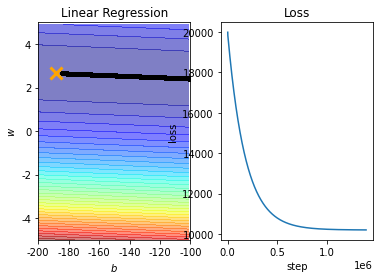

In [10]:
# plot the figure
plt.subplot(1, 2, 1)
C = plt.contourf(x, y, Z, 50, alpha=0.5, cmap=plt.get_cmap('jet'))  # 填充等高线
# plt.clabel(C, inline=True, fontsize=5)
plt.plot([-188.4], [2.67], 'x', ms=12, mew=3, color="orange")
plt.plot(b_history, w_history, 'o-', ms=3, lw=1.5, color='black')
plt.xlim(-200, -100)
plt.ylim(-5, 5)
plt.xlabel(r'$b$')
plt.ylabel(r'$w$')
plt.title("Linear Regression")

plt.subplot(1, 2, 2)
loss = np.asarray(loss_history[2:iteration])
plt.plot(np.arange(2, iteration), loss)
plt.title("Loss Curve")
plt.xlabel('step')
plt.ylabel('loss')
plt.show()
# 李宏毅老师课堂中的Demo要140万次才能收敛到最优，结果如下